<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
!pip install numpy pandas seaborn matplotlib scipy statsmodels


In [10]:
import requests
import io

In [13]:
import matplotlib.pyplot as plt

In [17]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
response = requests.get(URL)

In [20]:
!pip install pandas
import pandas as pd

In [23]:
boston_df = pd.read_csv(io.BytesIO(response.content))

In [24]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


Task 1: Familiarize Yourself with the Dataset

In [26]:
# Display the first few rows and summary statistics
print(boston_df.head())
print(boston_df.describe())


   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      

Task 2: Generate Descriptive Statistics and Visualizations

In [31]:
!pip install seaborn
import seaborn as sns


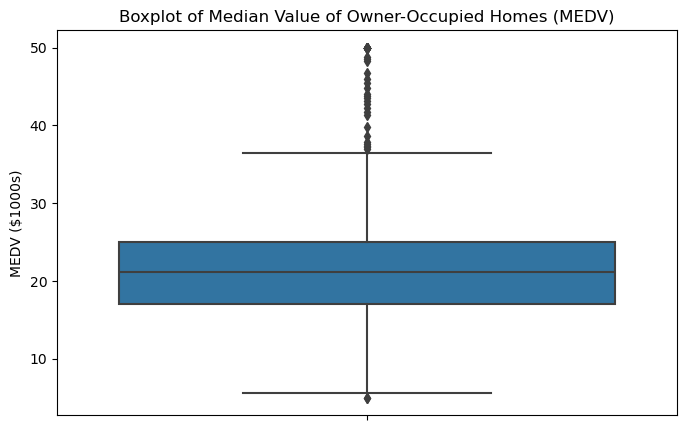

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()


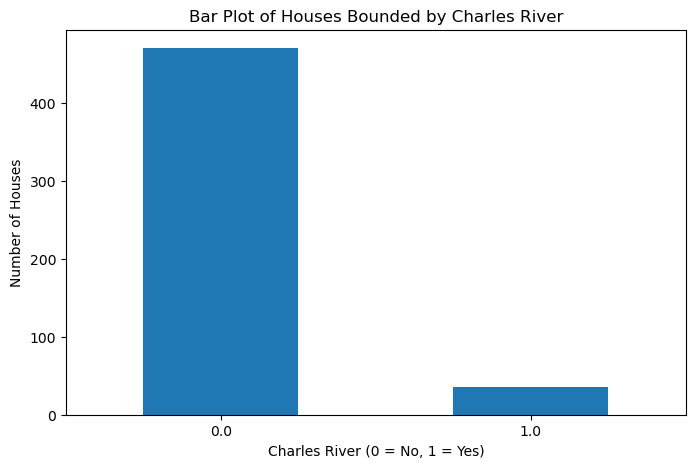

In [33]:
chas_counts = boston_df['CHAS'].value_counts()
plt.figure(figsize=(8, 5))
chas_counts.plot(kind='bar')
plt.title('Bar Plot of Houses Bounded by Charles River')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)
plt.show()


D:\python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


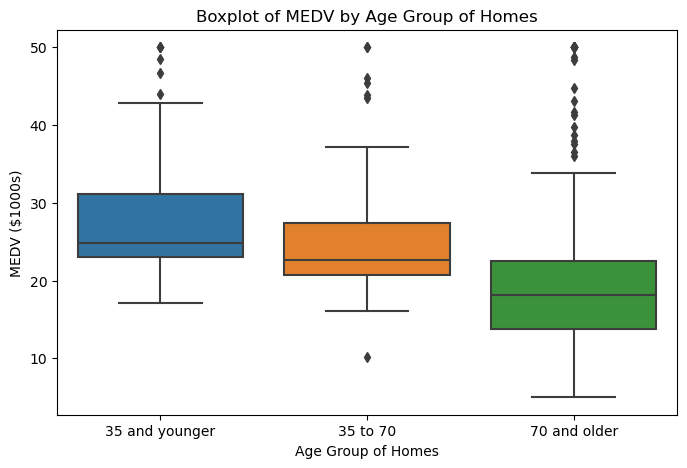

In [34]:
bins = [0, 35, 70, 100]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group of Homes')
plt.xlabel('Age Group of Homes')
plt.ylabel('MEDV ($1000s)')
plt.show()


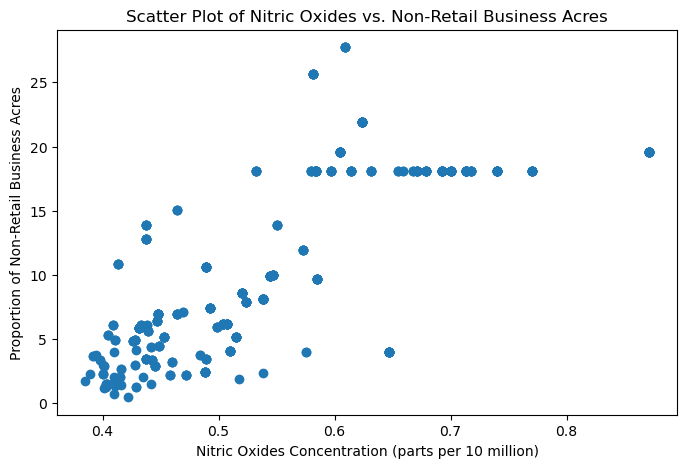

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxides vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxides Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


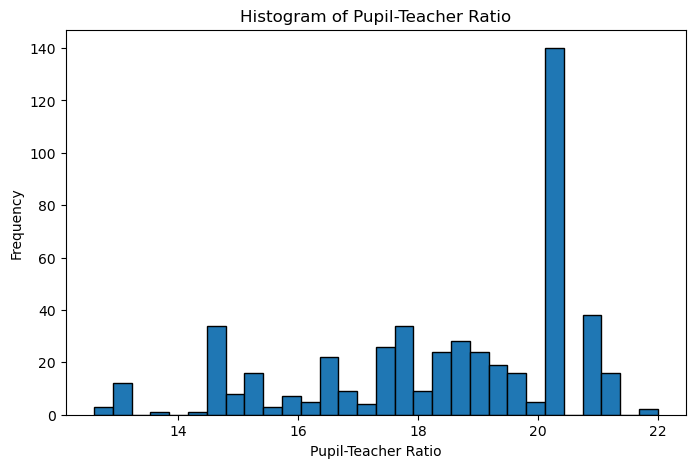

In [36]:
plt.figure(figsize=(8, 5))
plt.hist(boston_df['PTRATIO'], bins=30, edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


Task 3: Use Appropriate Tests to Answer Questions

In [37]:
from scipy import stats

river_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_river_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = stats.ttest_ind(river_houses, non_river_houses)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


In [38]:
f_stat, p_val = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35 to 70']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']
)
print(f"F-statistic: {f_stat}, P-value: {p_val}")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


In [39]:
correlation, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation: {correlation}, P-value: {p_val}")


Correlation: 0.763651446920915, P-value: 7.913361061241167e-98


In [42]:
!pip install statsmodels
import statsmodels.api as sm



In [43]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adds a constant term for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        06:14:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0